# Interpolation
A very common image processing operation is resizing an image. Consider the case where we want to increase image resolution. We must assign pixel intensities to 'new' pixels. We use interpolation to do this. This estimates the pixel intensity values using the pixel values in the original image.

## Nearest Neighbour Interpolation
This is the most basic interpolation method. Here, we assign the pixel intensity in the new pixel location to the nearest pixel in the original image.

As an example consider the case where we want to increase the resolution of a $2\times2$ image to a $4\times4$ image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# example image
I = np.array(([255,0], [0, 255]))
I.shape

(2, 2)

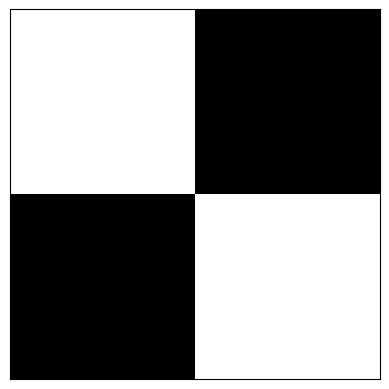

In [3]:
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
# pixel locations in the unit interval
x = np.linspace(0, 1, 2, endpoint=False)
y = np.linspace(0, 1, 2, endpoint=False)

In [5]:
X, Y = np.meshgrid(x, y)
XY = np.vstack((X.ravel(), Y.ravel())).T

In [6]:
pixel_val = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        print(X[i, j], Y[i, j], I[i, j])
        pixel_val.append(I[i,j])

0.0 0.0 255
0.5 0.0 0
0.0 0.5 0
0.5 0.5 255


In [7]:
XY

array([[0. , 0. ],
       [0.5, 0. ],
       [0. , 0.5],
       [0.5, 0.5]])

We now create the $4\times 4 $ image.

In [8]:
# pixel coordinate locations
u = np.linspace(0, 1, 4, endpoint=False)
v = np.linspace(0, 1, 4, endpoint=False)

In [9]:
[U, V] = np.meshgrid(u, v)

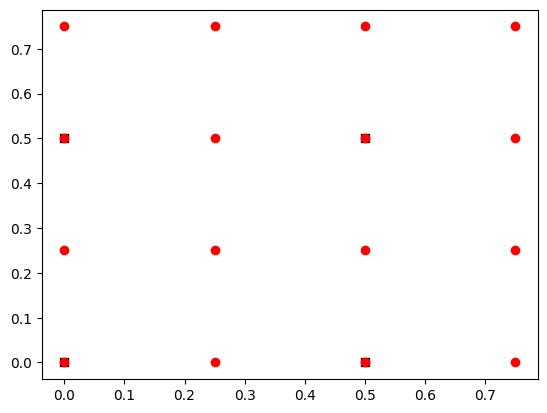

In [10]:
plt.plot(X, Y, 'ks')
plt.plot(U, V, 'ro')

In [11]:
# create the image with zeros
I2 = np.zeros(U.shape)

In [12]:
for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        I2[i,j] = pixel_val[np.argmin(np.sum((XY - np.array([U[i, j], V[i, j]])) ** 2, axis = 1))]

In [13]:
I2

array([[255., 255.,   0.,   0.],
       [255., 255.,   0.,   0.],
       [  0.,   0., 255., 255.],
       [  0.,   0., 255., 255.]])

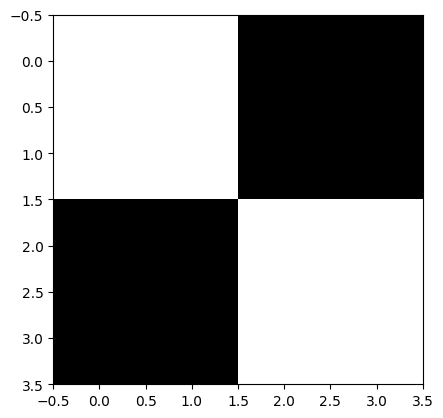

In [14]:
plt.imshow(I2, cmap='gray')
plt.show()

7


<Figure size 640x480 with 0 Axes>

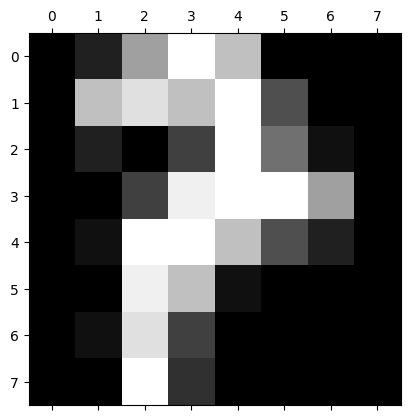

In [15]:
from sklearn.datasets import load_digits


digits = load_digits()
X_digits = digits.images
y_digits = digits.target
plt.gray();

indx = np.random.randint(0, X_digits.shape[0])
plt.matshow(X_digits[indx]);
print(y_digits[indx])

In [16]:
X_digits[indx].shape[0]

8

In [17]:
# pixel locations in the unit interval
x = np.linspace(0, 1, X_digits[indx].shape[0], endpoint=False)
y = np.linspace(0, 1, X_digits[indx].shape[0], endpoint=False)

X, Y = np.meshgrid(x, y)
XY = np.vstack((X.ravel(), Y.ravel())).T

pixel_val = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pixel_val.append(X_digits[indx][i,j])


In [18]:
# increase resolution
# pixel coordinate locations
u = np.linspace(0, 1, X_digits[indx].shape[0] * 2, endpoint=False)
v = np.linspace(0, 1, X_digits[indx].shape[0] * 2, endpoint=False)

[U, V] = np.meshgrid(u, v)

# create the image with zeros
I2 = np.zeros(U.shape)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        I2[i,j] = pixel_val[np.argmin(np.sum((XY - np.array([U[i, j], V[i, j]])) ** 2, axis = 1))]

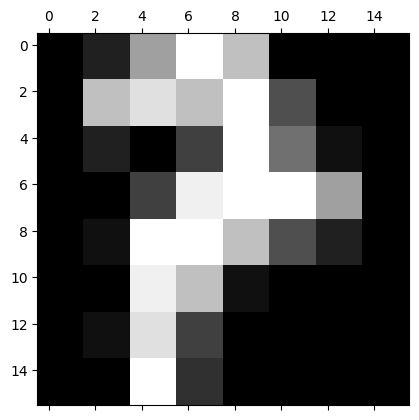

In [19]:
plt.matshow(I2);

In [20]:
# increase resolution
# pixel coordinate locations
u = np.linspace(0, 1, int(X_digits[indx].shape[0] * .5), endpoint=False)
v = np.linspace(0, 1, int(X_digits[indx].shape[0] * .5), endpoint=False)

[U, V] = np.meshgrid(u, v)

# create the image with zeros
I2 = np.zeros(U.shape)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        I2[i,j] = pixel_val[np.argmin(np.sum((XY - np.array([U[i, j], V[i, j]])) ** 2, axis = 1))]

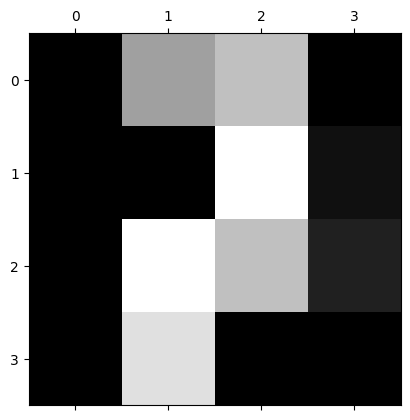

In [21]:
plt.matshow(I2);

## Bilinear Interpolation
In the example above, reduction in image quality was evident when using nearest neighbour interpolation. Other interpolation techniques aim to reduce this quality degradation. In bilinear interpolation, the pixel instensity is given by

\begin{equation}
\upsilon(x,y) = a+  bx + cy + dxy 
\end{equation}

The four constants are determined using four equations in four unknowns from the locations nearest neighbours.

![](img/BilinearInterpolationV2.svg)

[source](https://en.wikipedia.org/wiki/Bilinear_interpolation)

The coefficients are found by solving the equation

\begin{equation}
\begin{bmatrix}
1 & x_1 & y_1 &x_1y_1 \\
1 & x_1 & y_2&x_1y_2 \\
1 & x_2 & y_1 &x_2y_1 \\
1 & x_2 & y_2&x_2y_2 \\
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c \\
d \\
\end{bmatrix}=
\begin{bmatrix}
f(Q_{11}) \\
f(Q_{12})  \\
f(Q_{21})  \\
f(Q_{22})  \\
\end{bmatrix}
\end{equation}

## Compare with OpenCV

In [22]:
import cv2

In [23]:
cv2.resize(X_digits[indx], (4, 4), interpolation=cv2.INTER_NEAREST)

array([[ 0., 10., 12.,  0.],
       [ 0.,  0., 16.,  1.],
       [ 0., 16., 12.,  2.],
       [ 0., 14.,  0.,  0.]])

In [24]:
I2

array([[ 0., 10., 12.,  0.],
       [ 0.,  0., 16.,  1.],
       [ 0., 16., 12.,  2.],
       [ 0., 14.,  0.,  0.]])

### Now run Bilinear Interpolation

In [25]:
I_bi = cv2.resize(X_digits[indx], (4, 4), interpolation=cv2.INTER_LINEAR)

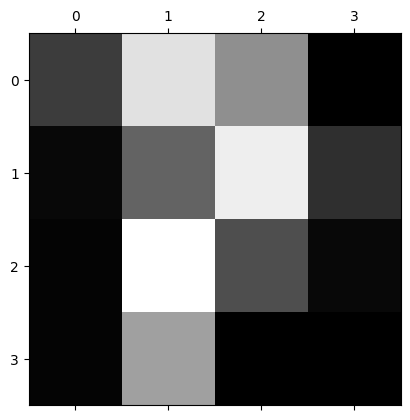

In [26]:
plt.matshow(I_bi);